### Cena 2
- Simulação com a mini câmara com material.
- Aplicando impedância de superfície calculada apartir da formulação da ISO 354.


### Importando bibliotecas


In [2]:
# Importando bibliotecas

import femder as fd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
from femder.FEM_3D import  p2SPL

Default Plotly renderer: jupyterlab


### Importando resultados experimentais
- velocidade de volume
- coef. absorção ISO 354
- sinal medido nos receptores
- respostas impulsivas

In [3]:
import scipy.io as sio

q = sio.loadmat(r'G:\\Meu Drive\\TCC\\Simulacao_computacional\\Qi.mat')
# sorted(q.keys())
q = q['Qi'] # até 600Hz

as_medido = sio.loadmat(r'G:\\Meu Drive\\TCC\\Experimental\\com_material\\espessura_menor\\a_s.mat')
# sorted(as_medido.keys())

R_comMat = sio.loadmat(r'G:\\Meu Drive\\TCC\\Experimental\\com_material\\espessura_menor\\pts_freq.mat')
# sorted(R_semMat.keys())

RI_comMat = sio.loadmat(r'G:\\Meu Drive\\TCC\\Experimental\\com_material\\espessura_menor\\RIs.mat')



In [31]:
sorted(RI_comMat.keys())

['RIs_sz', '__globals__', '__header__', '__version__']

### Importar geometria, inicializando as classes dos dados de entrada da simulação

In [4]:
# Importar geometria, inicializando as classes dos dados de entrada da simulação

path_to_geo = "G:\Meu Drive\TCC\Simulacao_computacional\codes\geo\material_menosEspesso\menosEspesso_semvol.iges"

AP = fd.AirProperties(c0 = 343)
fmax = 2000 #2300
fmin = 150
AC = fd.AlgControls(AP,fmin,fmax,0.5)
S = fd.Source("spherical")
S.coord = np.array([[1.222,0.15,0.2]])
S.q = np.array(q)
#S.q = np.array([0.001])
R = fd.Receiver()
#R.coord = np.array([[0.33,0.23,0.21],[0.38,0.93,0.21],[0.92,0.95,0.21]]) 
R.coord = np.array([[1.057,0.695,0.282],[0.425,0.925,0.235],
                    [0.409,0.406,0.235],[0.336,0.677,0.282],
                    [0.685,0.965,0.235],[0.661,0.30,0.235]])
 

In [129]:
# Recuperando a impedância de superficie das paredes da minicamara apartir do coef. de abs medido pela ISO 354

from sea.sea.materials import Material as mat

#with open(r"G:\Meu Drive\TCC\codes\dados-pickle\admitance_minicamara1.pkl","rb") as arquivo:
  #sup_admittance = pickle.load(arquivo)
  
sup = mat(third_octave_bands_statistical_alpha=[0.0331, 0.0255, 0.054, 0.0819, 0.0959, 0.2859, 0.2155, 0.4086, 0.4927, 0.5734, 0.6041], third_octave_bands = [200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000], freq_vec=AC.freq)
sup.impedance_from_alpha(absorber_type="soft porous")
sup_admittance = sup.admittance # Admitancia normalizada
sup_surface_impedance = sup.surface_impedance # Impedancia não normalizada 

Working on the solution of the constrained optimization problem...
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5868709777535699
            Iterations: 17
            Function evaluations: 107
            Gradient evaluations: 17
[ 0.          0.09498414  0.00346359  0.02179036 -0.99999999]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.016079327196396393
            Iterations: 27
            Function evaluations: 163
            Gradient evaluations: 27
[ 1.48263314e+00  3.62331709e-01  1.14293781e+00  5.39695053e-18
 -4.82373987e-01]
The solution of the optimization problem leads to rmk+1 parameters equal to [ 1.48263314e+00  3.62331709e-01  1.14293781e+00  5.39695053e-18
 -4.82374001e-01].
Impedances, admittances and everything else related to it was already calculated.



In [52]:
# with open('G:\Meu Drive\TCC\Simulacao_computacional\codes\dados-pickle\Cena 2\sup_admittance150-2k.pkl', "wb") as arquivo:
#     pickle.dump(sup, arquivo)

# import pickle
with open("G:\Meu Drive\TCC\Simulacao_computacional\codes\dados-pickle\cena1\sup_admittance150-2K.pkl","rb") as arquivo:
  sup_minicam = pickle.load(arquivo)

# with open("G:\Meu Drive\TCC\Simulacao_computacional\codes\dados-pickle\Cena 2\sup_admittance150-2k.pkl","rb") as arquivo:
#   sup_mat = pickle.load(arquivo)

In [149]:
# Boundary Conditions
BC = fd.BC(AC,AP) #[2,3,4,5,6,7]
BC.normalized_admittance(6,sup.admittance)
#BC.delany(6,RF=12100, d=0.01, model='miki')
BC.normalized_admittance([2,3,4,5,7,8,9,10,11,12],0.004)

In [121]:
As_rec = BC.mu[6] #RECUPERADA

In [123]:
As_dbm = BC.mu[6] #DBM

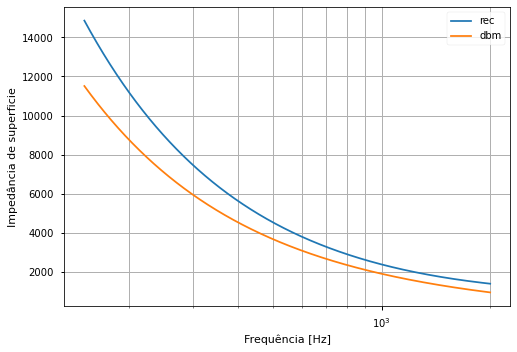

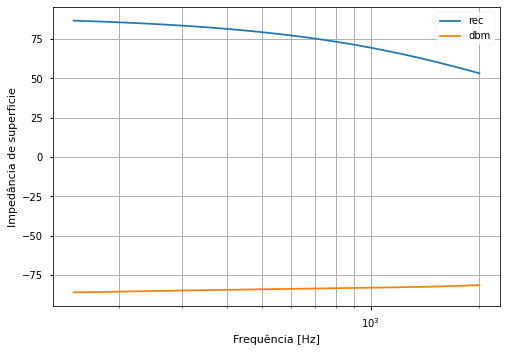

In [117]:
plt.semilogx(AC.freq, abs(1/As_rec), label='rec')
plt.semilogx(AC.freq, abs(1/As_dbm), label='dbm')
#plt.xlim(20, 10000)
#plt.ylim(0, 100)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Impedância de superficie')
plt.legend()
plt.grid(True,which="both")
#plt.savefig('L_fixo.png')
plt.show()

plt.semilogx(AC.freq, np.angle(1/zs_rec,deg=True), label='rec')
plt.semilogx(AC.freq, np.angle(1/zs_dbm,deg=True), label='dbm')
#plt.xlim(20, 10000)
#plt.ylim(0, 100)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Impedância de superficie')
plt.legend()
plt.grid(True,which="both")
#plt.savefig('L_fixo.png')
plt.show()

### Verificação da equivalência entre os alphas (in x recuperado)

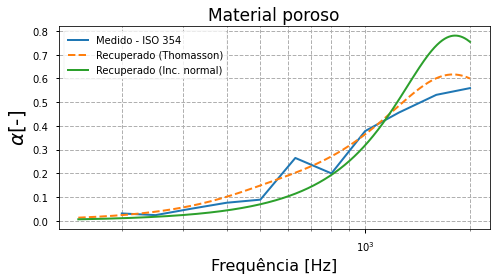

In [150]:
# Verificação da equivalência entre os coefs 
## () analisar recuperando com alphas em bando de terç de oitava
## () calcular erro entre os coefs
z_ar = AP.c0*AP.rho0
#Zs = sup.surface_impedance/z_ar
Zs = BC.mu[6]*z_ar
Reflexao = (Zs - 1) / (Zs + 1)
Absorcao = 1 - (np.abs(Reflexao) ** 2)  # 1 - |R|²
plt.figure(figsize=(7,4))
plt.semilogx(as_medido['f'][:11], as_medido['a_s'][:11], linestyle='-', label = 'Medido - ISO 354',linewidth=2)
plt.semilogx(AC.freq, sup.statistical_alpha,label='Recuperado (Thomasson)', linestyle='--', linewidth=2)
plt.semilogx(AC.freq, Absorcao, linestyle='-', label = 'Recuperado (Inc. normal)',linewidth=2)
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.title('Material poroso', fontsize=17)
plt.xlabel('Frequência [Hz]', fontsize=16)
plt.ylabel(r'$\alpha$[-]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
plt.tight_layout()
#plt.ylim((0,0.4))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
plt.show()

### Geração da malha, inicializando a classe FEM3D com os dados de entrada e o plote da geomeria com a malha 2D


In [141]:
grid = fd.GridImport3D(AP,path_to_geo,S,R,fmax = fmax,num_freq=6,scale=1000,order=1,load_method='meshio')
obj = fd.FEM3D(grid,S,R,AP,AC,BC)
obj.plot_problem(renderer='browser',saveFig=False,camera_angles=['diagonal_front'],extension='png')

### Cálculo das pressões com o método de elementos finitos

In [142]:
obj.compute() # debug e comparar vel const e dpendente freqa
obj.evaluate(R,True)

FEM | Assembling surface matrix: 100%|█████████████████████████| 11/11 [00:00<00:00, 16.98it/s]
100%|██████████| 3701/3701 [3:48:29<00:00,  3.70s/it]  


Time taken: 229.03460757335026 min


array([[-0.10051264+0.5524962j , -0.11372959-1.42841677j,
        -0.21519016-2.11991284j, -0.15010607-1.85019381j,
        -0.08546855-0.64579513j, -0.22208835-1.09816423j],
       [-0.10168831+0.45451099j, -0.13324794-1.39920172j,
        -0.25209362-2.1032267j , -0.17815843-1.81386568j,
        -0.09558862-0.653265j  , -0.24921459-1.15598556j],
       [-0.10668687+0.36016681j, -0.15242975-1.37705259j,
        -0.28974115-2.09967008j, -0.20588644-1.78812195j,
        -0.10647407-0.66331428j, -0.27948886-1.22058747j],
       ...,
       [-0.28573566-1.01178896j,  0.47014292+0.20151234j,
        -0.33631842+0.09491595j,  0.44110188+0.36041929j,
         0.17713888-0.08089325j, -0.05334913-0.33504877j],
       [-0.38979856-0.92882595j,  0.5279721 +0.14008099j,
        -0.30872144+0.16376851j,  0.50269458+0.3112313j ,
         0.16818573-0.08708267j, -0.12532213-0.37074646j],
       [-0.45878363-0.82923152j,  0.56698054+0.06005531j,
        -0.26310502+0.20997541j,  0.55327204+0.25188307

In [147]:
# Salva var
with open("G:\Meu Drive\TCC\Simulacao_computacional\minicamara_comMat\menos_espesso\Zs_recu_cte0_004_obj_Minicamara_150_2000_0_5.pkl", "wb") as arquivo:
    pickle.dump(obj.pR, arquivo)


In [1]:
343/150

2.2866666666666666

### Plote dos NPS resultantes em cada receptor

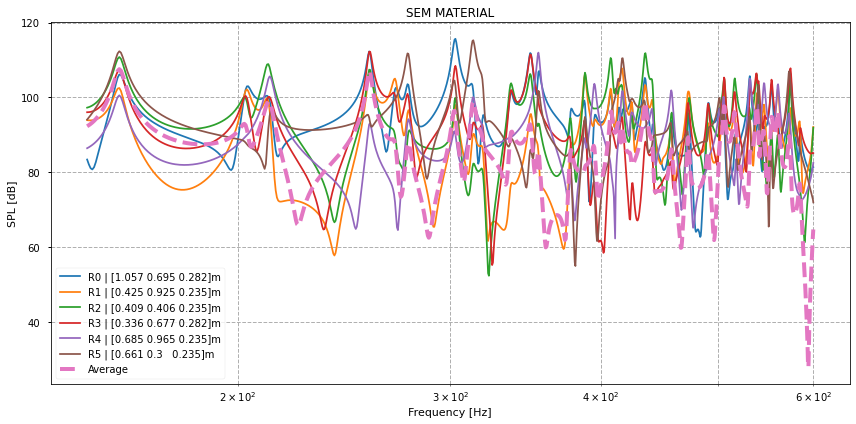

In [46]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))

if len(obj.R.coord)==1:
  plt.semilogx(obj.freq, p2SPL(obj.pR), linestyle='-', label=f'R | {obj.R.coord[0]}m')
else:
  for i in range(len(obj.R.coord)):
      plt.semilogx(obj.freq, p2SPL(obj.pR[:,i]), linestyle='-', label=f'R{i} | {obj.R.coord[i,:]}m')

if len(obj.R.coord) > 1:
  pR_med = np.mean(obj.pR,axis=1)
  plt.semilogx(obj.freq, p2SPL(pR_med), linestyle='--', label='Average', linewidth=4)
plt.title('SEM MATERIAL')
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
#plt.ylim(40,160)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([100,125,160,200,250,315,400,500,630,1000,1250],[100,125,160,200,250,315,400,500,630,1000,1250]);
#plt.ylim(40,160)
plt.tight_layout()
plt.show()

### Comparação NPS dos pontos medido e simulado

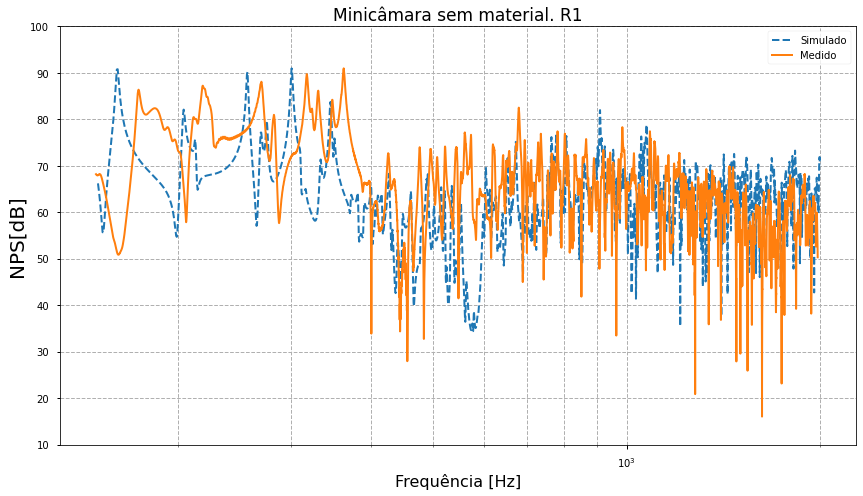

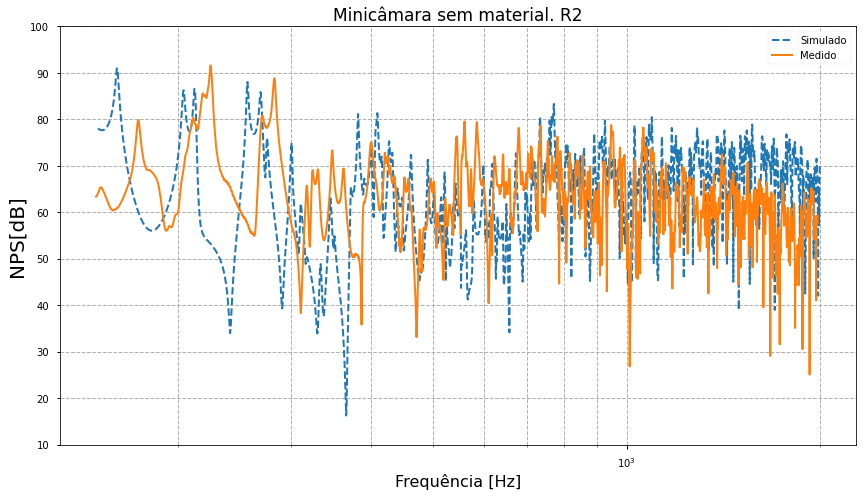

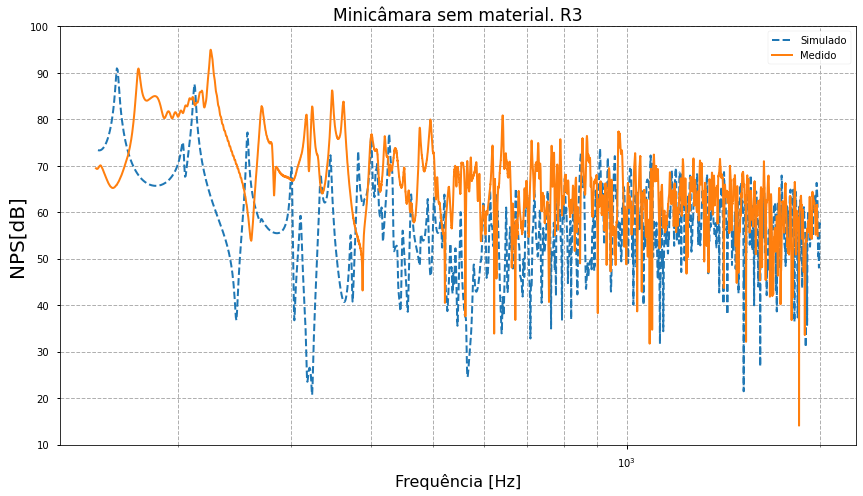

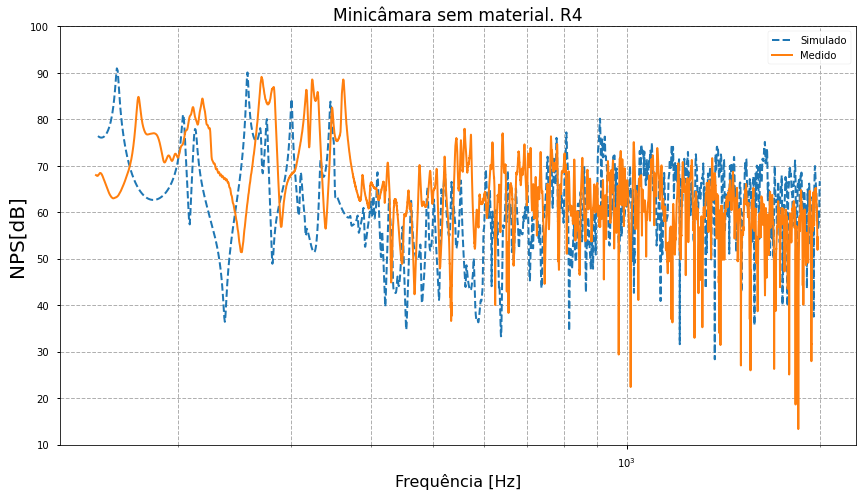

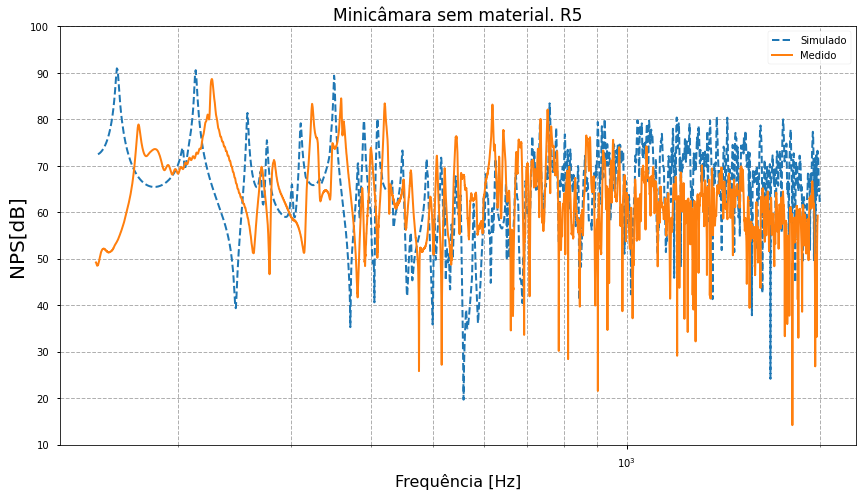

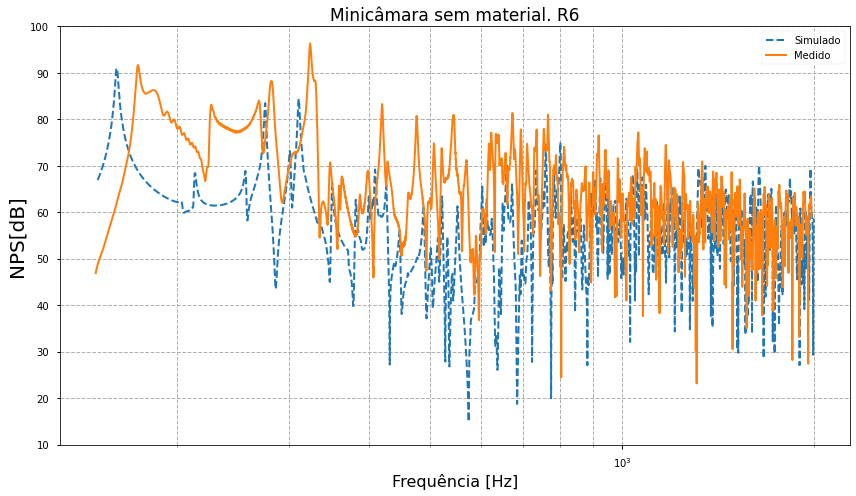

In [143]:
# Impedância de superficie recuperada pelo alpha obtido pela ISO 354
for n in range(0,6):
    plt.figure(figsize=(12,7))
    plt.semilogx(AC.freq, p2SPL(obj.pR[:,n]/max(abs(obj.pR[:,n]))),label='Simulado', linestyle='--', linewidth=2)
    plt.semilogx(R_comMat['freqVector'][1981:26401,0], p2SPL(R_comMat['pts_freq'][1981:26401,n]/max(abs(R_comMat['pts_freq'][1981:26401,0]))), linestyle='-', label = 'Medido',linewidth=2)
    plt.grid(linestyle = '--', which='both')
    plt.legend(loc='best')
    plt.title(f'Minicâmara sem material. R{n+1}', fontsize=17)
    plt.xlabel('Frequência [Hz]', fontsize=16)
    plt.ylabel(r'NPS[dB]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
    plt.tight_layout()
    plt.ylim((10,100))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
    plt.show()  

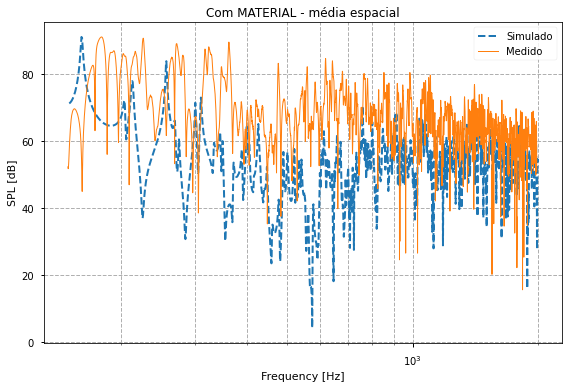

In [144]:
plt.title('Com MATERIAL - média espacial')
pR_med = np.mean(obj.pR,axis=1) # R_semMat['R_semMatfreq'][2641:7921,n]
R_med = np.mean(R_comMat['pts_freq'][1981:26401],axis=1)
plt.semilogx(obj.freq, p2SPL(pR_med/max(abs(pR_med))), linestyle='--', label='Simulado', linewidth=2)
plt.semilogx(R_comMat['freqVector'][1981:26401,0], p2SPL(R_med/max(abs(R_med))), linestyle='-', label='Medido', linewidth=1)
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
# plt.ylim(40,160)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([100,125,160,200,250,315,400,500,630,1000,1250],[100,125,160,200,250,315,400,500,630,1000,1250]);
#plt.ylim(40,160)
plt.tight_layout()
plt.show()

### Comparação RIs dos pontos medido e simulado

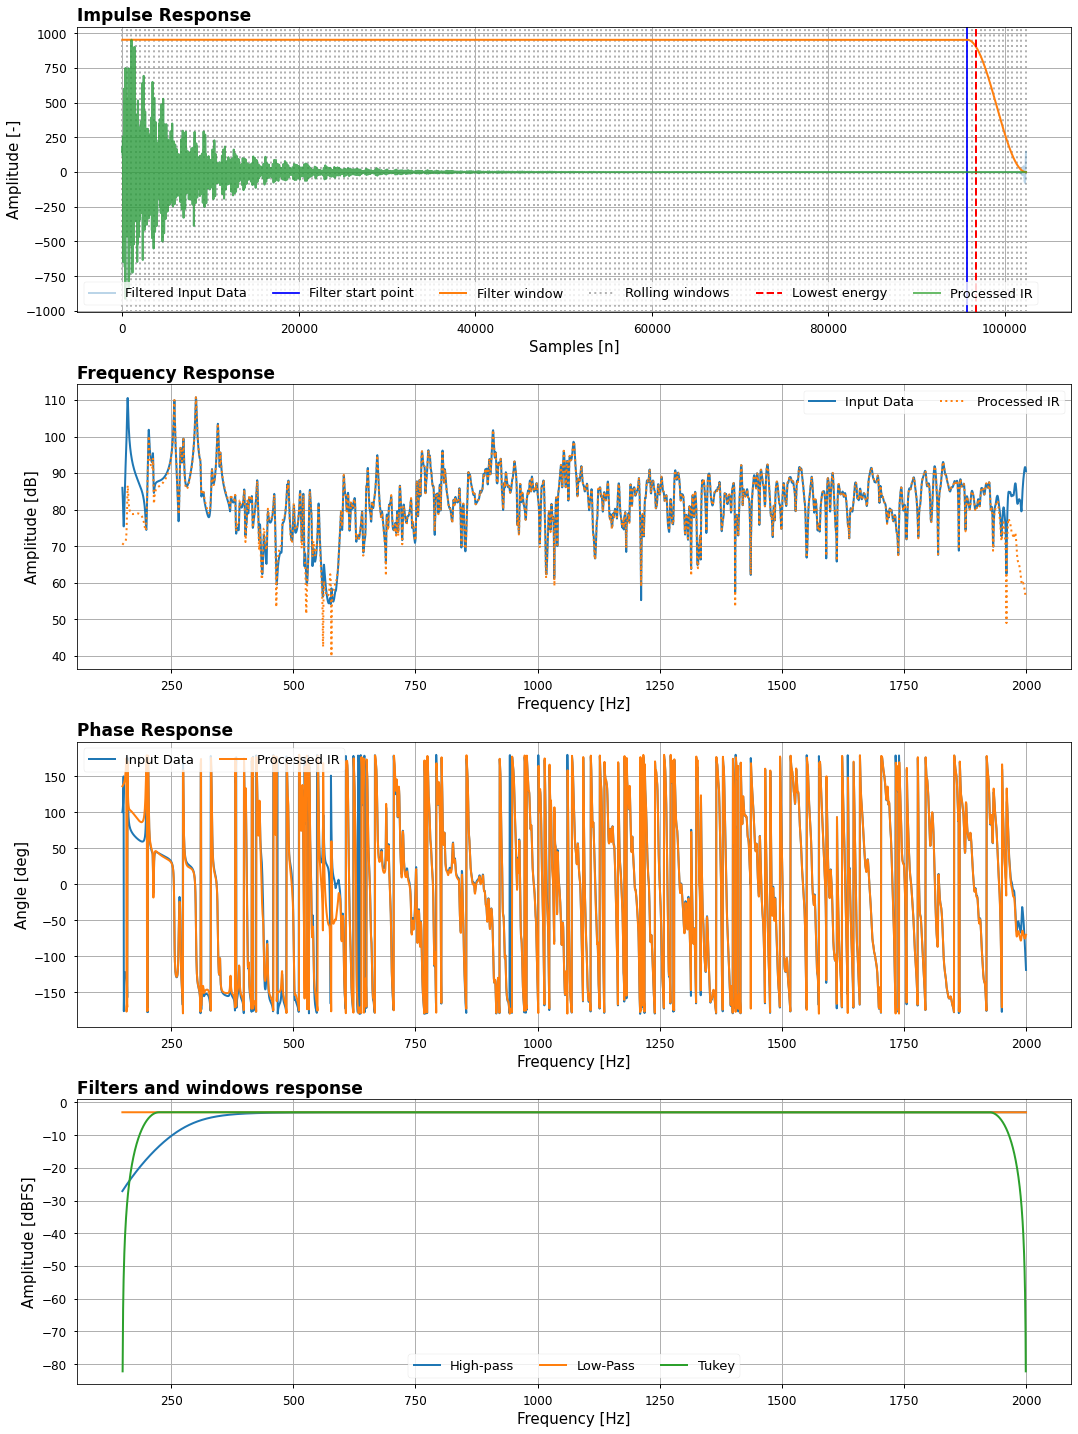

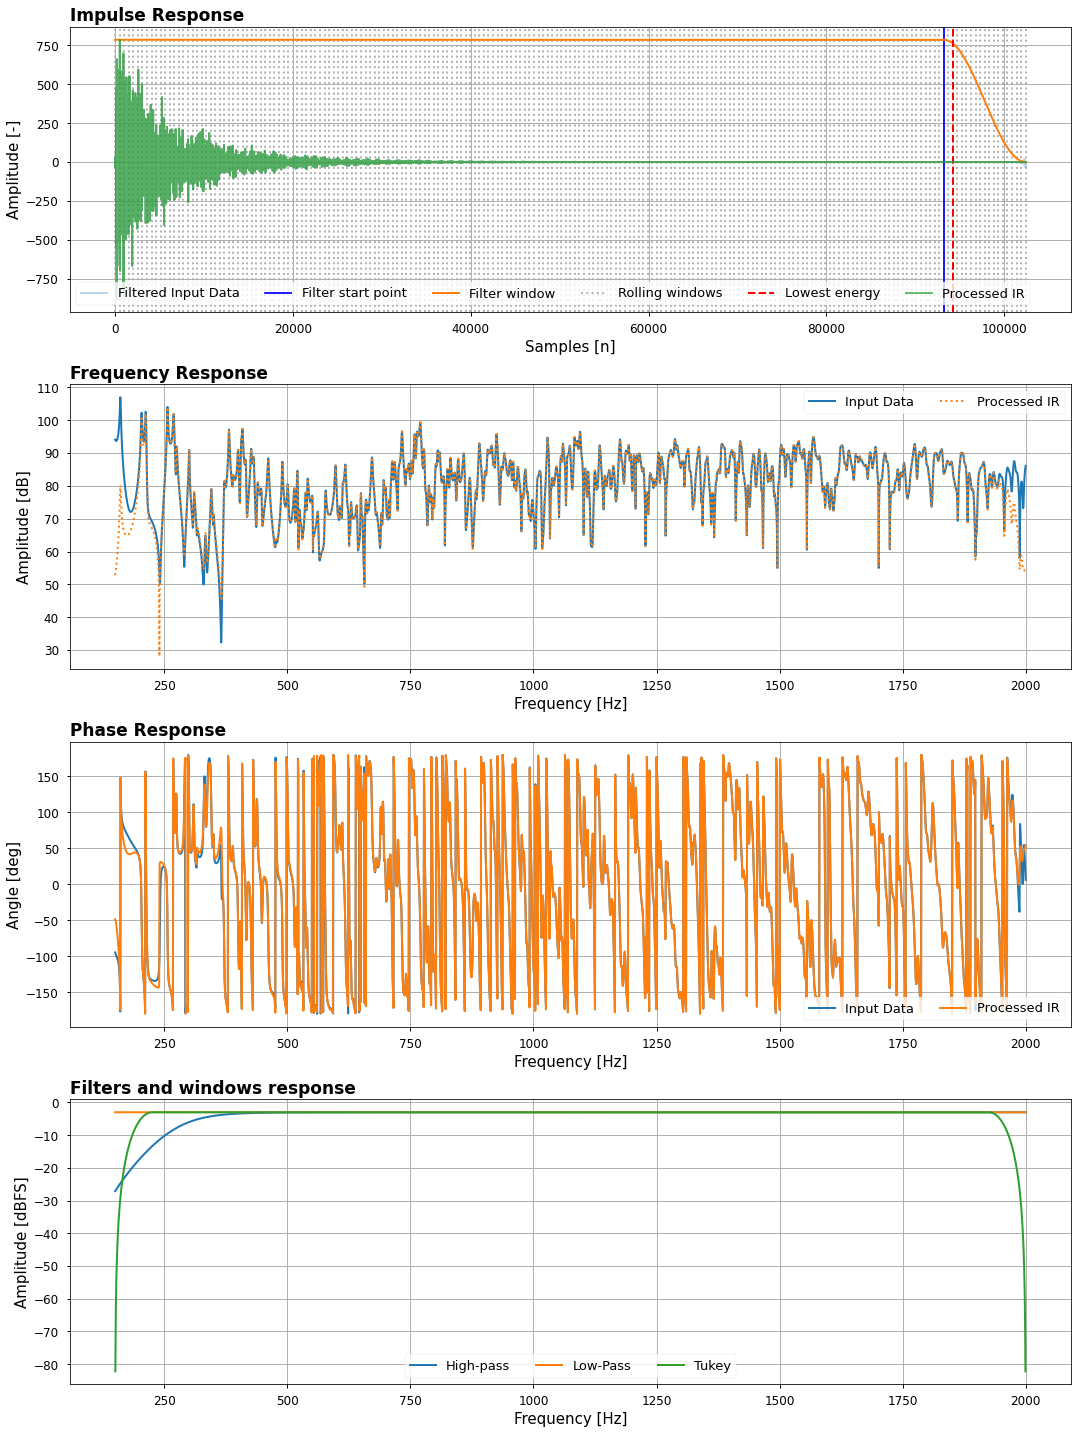

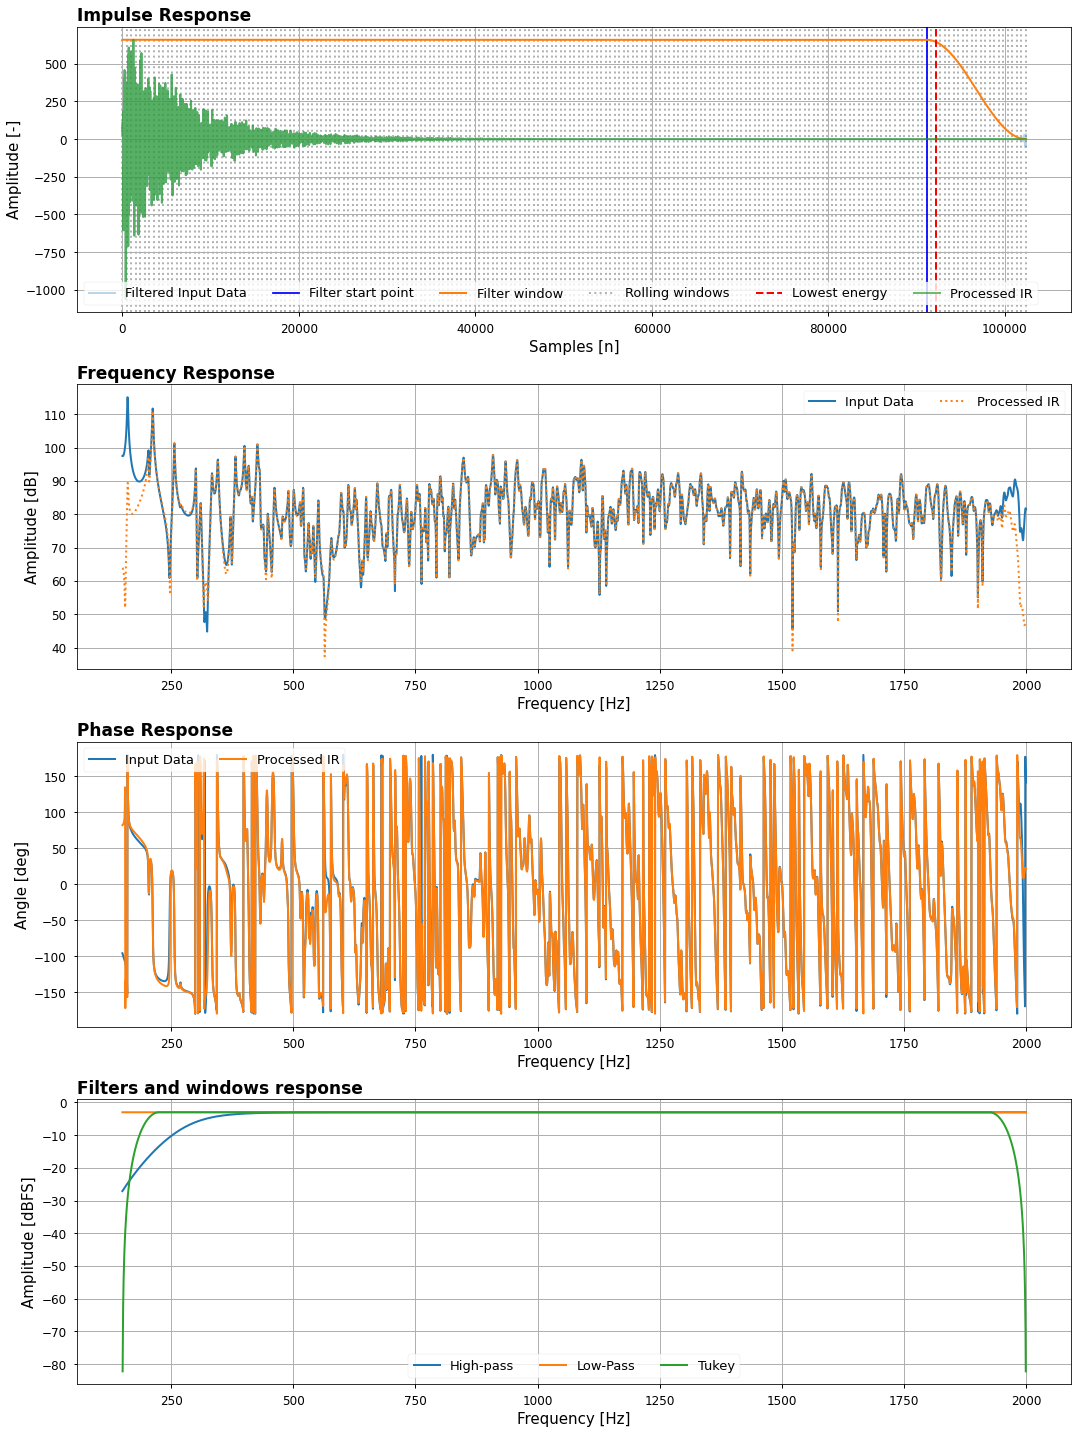

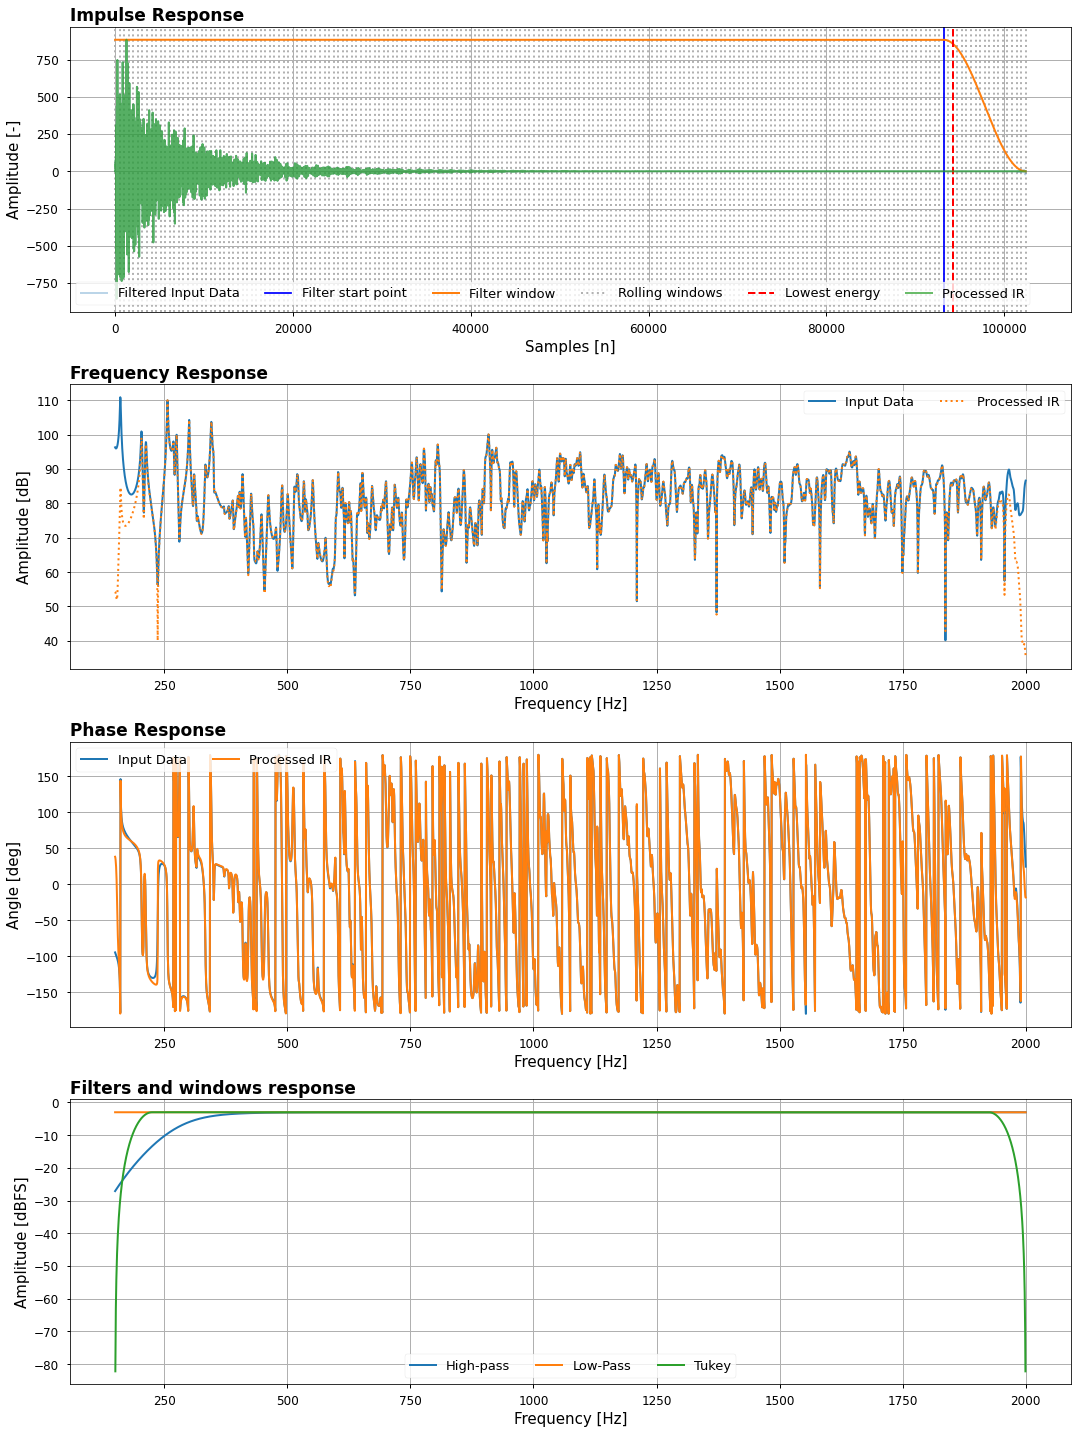

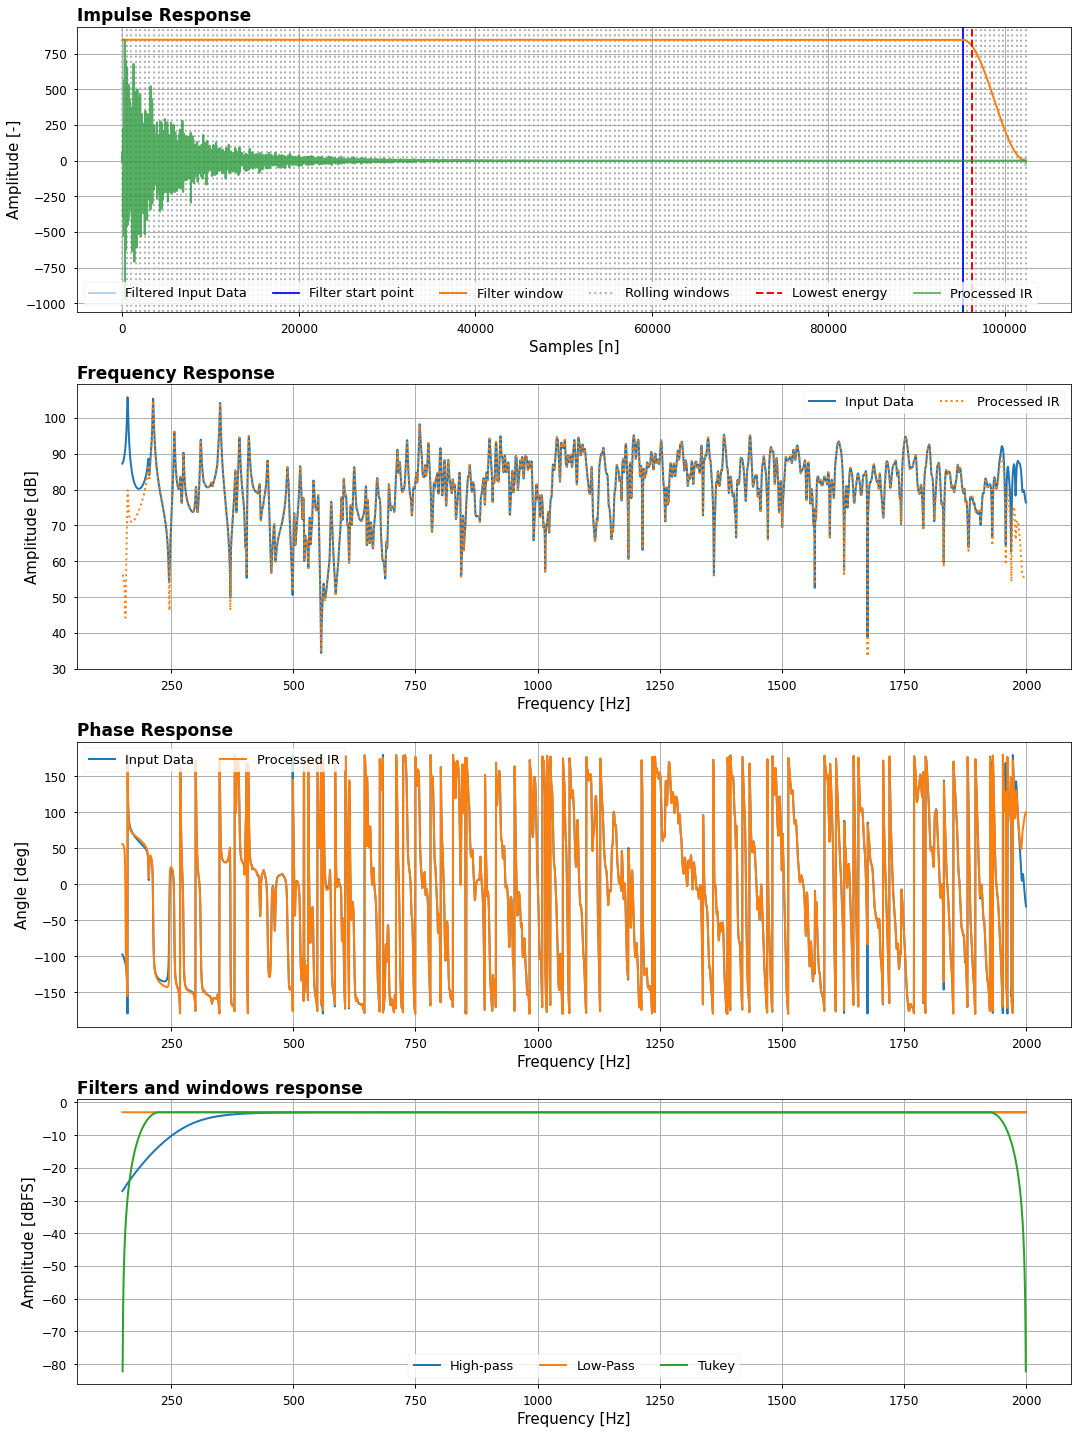

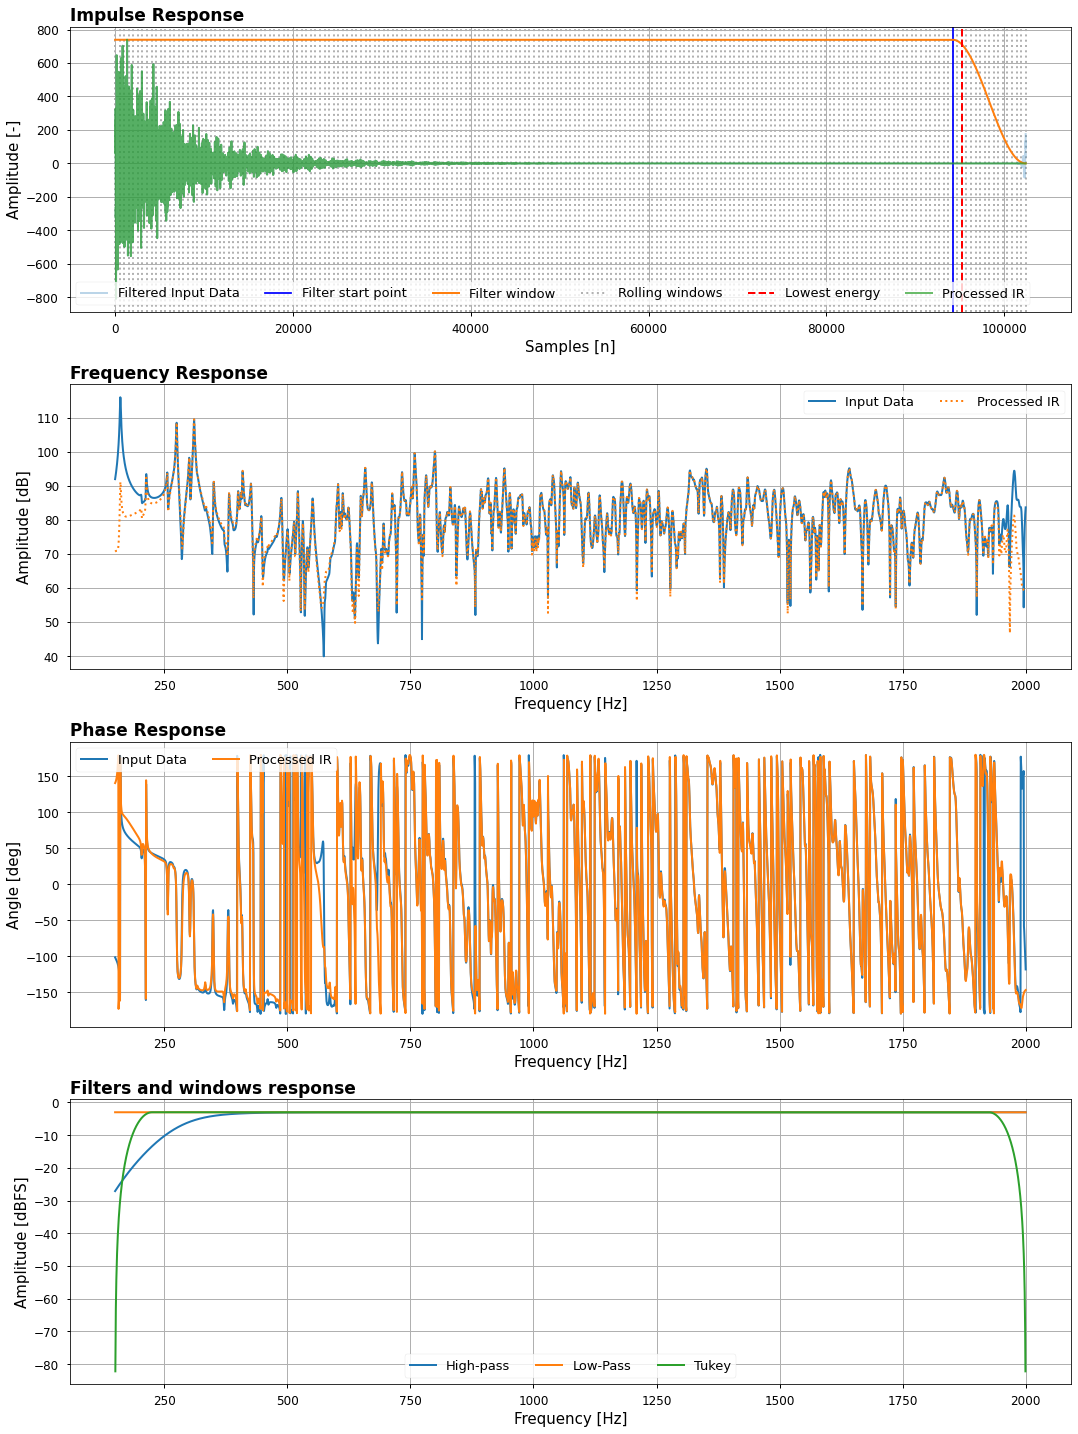

In [145]:
#%% Resposta Impulsiva
domain = fd.Domain(fmin, fmax,2,51200)
domain.alpha = 0.1
ir = np.zeros((len(RI_comMat['RIs_sz']),len(obj.pR[0,:])))
for n in range(0,len(obj.pR[0,:])):
    ir[:,n] = domain.compute_impulse_response(obj.pR[:,n], view=True, irr_filters=False)


In [146]:
# Salvar os dados p importar no MATLAB
from scipy.io import savemat
savemat('G:\Meu Drive\TCC\Simulacao_computacional\minicamara_comMat\menos_espesso\Zs_recu_cte_004_RIs_simuladas.mat',{'RIs':ir,'freq':AC.freq})


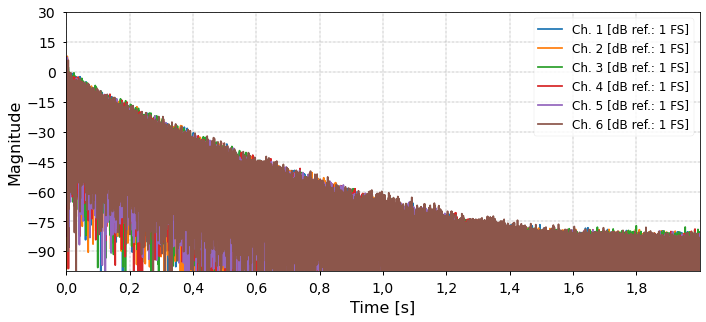

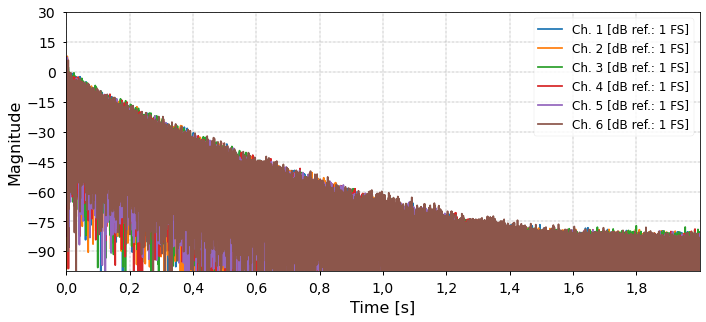

In [84]:

import pytta
txAmostragem = 51200 # [Hz]
# fftDegree = 19
# T = (2**fftDegree-1)/txAmostragem # [s]
# Cria vetor no tempo de um sinal aleatório
#meuRuido = np.random.randn(txAmostragem*T)
# SignalObj com sinal provido pelo usuário
RI_semMat = pytta.SignalObj(RI_semMat['RIs_sz'], 'time', txAmostragem) 
RI_semMat.plot_time_dB(yLim=[-100,30])

### Plote do campo de pressão

In [63]:
# Plote do campo de pressão
obj.pressure_field(frequencies = 300,renderer='browser',axis=['xy','yz'],saveFig=False,camera_angles=['diagonal_front'],extension='pdf')

G:\Meu Drive\TCC\Simulacao_computacional\codes\geo\mini-camarareverb.iges


100%|██████████| 203/203 [00:00<00:00, 2788.65it/s]



	Elapsed time to evaluate acoustic field: 0.09 minutes

